In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import IamLinesDataset

In [54]:
dataset = IamLinesDataset(train=True)
dataset.load_or_generate_data()
print(dataset)

IAM Lines Dataset
Number classes: 81
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_', 80: '<blank>'}
Data: (7101, 28, 952)
Targets: (7101, 97)



In [55]:
dataset.output_shape

(97, 81)

In [56]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapper(int(i)) for i in y]).rstrip("_")

convert_y_label_to_string(dataset.targets[0])

'A MOVE to stop Mr. Gaitskell from'

Griffiths resolution. Mr. Foot's line will
be that as Labour M Ps opposed the
Government Bill which brought life peers
into existence, they should not now put
forward nominees. He believes that the
House of Lords should be abolished and
that Labour should not take any steps
which would appear to "prop up" an out-
Since 1958, 13 Labour life Peers and
Peeresses have been created. Most Labour


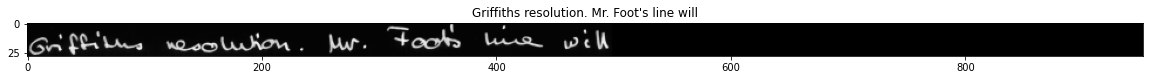

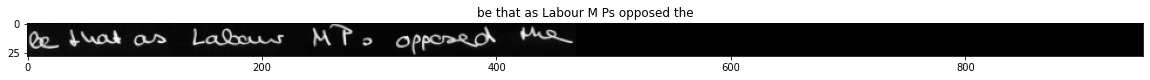

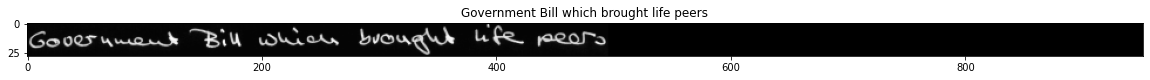

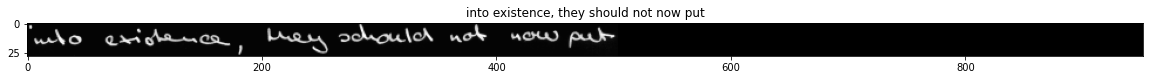

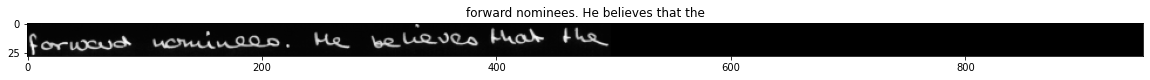

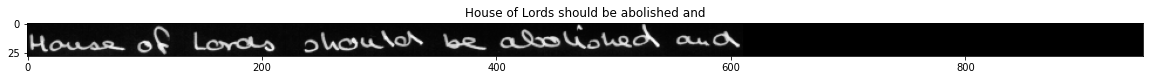

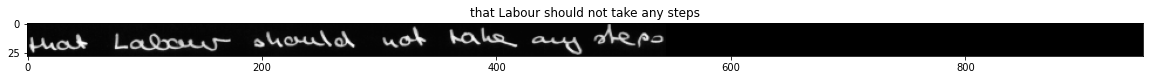

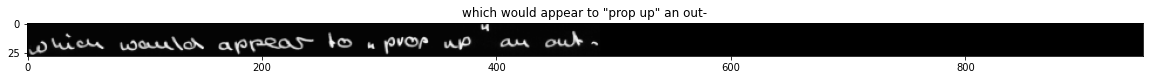

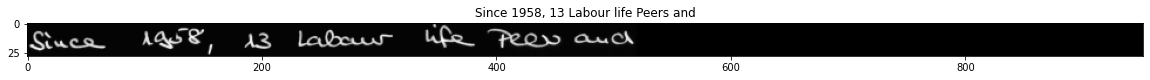

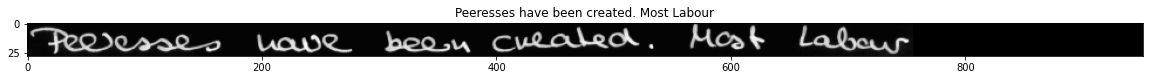

In [57]:
for i in range(10, 20):
    plt.figure(figsize=(20, 20))
    data, target = dataset[i]
    sentence = convert_y_label_to_string(target) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0).numpy(), cmap='gray')

In [106]:
data, target = dataset[10]

In [107]:
text = convert_y_label_to_string(dataset.targets[10])

In [108]:
data1, target1 = dataset[110]

In [60]:
text

"Griffiths resolution. Mr. Foot's line will"

In [89]:
S = 30
S_min = 10
N = 16
C = 20

In [92]:
torch.randint(low=1, high=C, size=(N, S), dtype=torch.long)

tensor([[ 6, 10,  2, 17,  8, 18, 16,  4, 14, 14,  6,  9,  4, 14, 10, 10, 12,  4,
         11, 18, 19,  4, 10,  8, 13,  2, 18,  4, 17,  9],
        [ 8, 13,  8,  5,  5,  6,  4, 10,  9, 14, 19,  6,  7,  6, 10,  6,  5,  3,
         14, 10,  1, 18,  3,  3, 13, 13, 16, 12,  5,  6],
        [ 1,  9, 18, 10, 10, 10, 10,  6,  7,  7, 14,  6, 12, 12,  3,  9, 14, 16,
         11, 14,  3, 10,  9, 15, 19,  8, 13,  5, 12, 15],
        [10,  2,  6, 11, 14,  1, 13,  1,  7,  2, 19,  1,  1, 17,  6, 16, 18, 12,
          3, 18, 19, 17,  9, 12, 14, 15,  3,  8,  1,  9],
        [12,  7, 14,  5,  2, 12,  1, 16,  9, 16, 18, 17,  6, 11,  2,  7,  5,  8,
         16,  6, 19, 13, 12, 17, 11, 13, 17, 12,  5,  1],
        [13, 11, 14, 18, 15,  8, 17, 13, 18,  5, 10,  6, 15,  3,  4, 11, 12,  5,
          4,  1, 17, 12,  7,  5,  5,  9, 19, 15,  4,  5],
        [12,  1,  4,  5,  6, 13, 19,  1,  1, 15,  3, 14,  8, 19,  7,  5, 19,  9,
          5, 11, 14, 10, 11,  1, 12, 19, 14, 13, 19, 15],
        [16,  3,  7, 10, 12

In [94]:
T = 50      # Input sequence length

In [125]:
target_lengths = torch.randint(low=1, high=T, size=(N,), dtype=torch.long)
target = torch.randint(low=1, high=C, size=(sum(target_lengths),), dtype=torch.long)

In [129]:
input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)

In [130]:
input_lengths

tensor([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])

In [126]:
target_lengths

tensor([20, 28, 20, 32, 30, 34, 14, 15, 21,  3, 20, 13, 28, 40, 15, 27])

In [128]:
target

tensor([17, 17,  5,  5, 15,  5, 16, 19, 12,  3,  6, 15,  6, 13, 10,  1, 19, 12,
         2, 13, 19, 13,  7,  4, 19,  9, 19,  1,  3, 16,  1, 12, 11,  8, 17,  6,
        10,  8, 15, 15, 18, 11,  2,  6, 17,  8,  1, 12,  3, 15, 10, 14,  3,  3,
        17,  4, 18, 15, 13, 18, 19, 12,  1, 17, 18,  9, 10,  8,  2,  3,  9,  4,
         7,  9, 12, 11,  9,  5, 12, 10,  4, 15,  8,  6, 17,  9,  7,  7, 18, 15,
        16, 16, 14, 17, 11, 14, 13,  9, 10, 19,  7, 13, 12,  5, 19,  3,  7, 18,
         7,  6,  5,  1,  6, 11,  1, 19, 18, 15,  6,  4, 13, 14, 12, 19, 18,  4,
        15, 14, 12,  1, 14, 18,  1,  4,  1,  7, 12,  6,  3,  9,  8, 19,  7, 13,
         1,  4, 14,  1, 14,  8, 19,  2,  6, 11, 19, 11,  3, 13, 14, 17,  3,  3,
        10, 10, 18,  2, 11, 10,  8,  2, 18,  9,  2,  1, 16,  2,  5,  9,  1,  4,
        16, 18, 12, 11, 12, 13, 13, 18,  2,  3,  2,  7, 18,  8,  2, 16, 12, 18,
        10, 15, 16, 12,  3,  5,  6,  2, 14,  3, 10,  2, 12, 14,  3, 14, 11, 14,
         6, 11,  5,  4,  6,  9, 17,  1, 

In [111]:
target[target < 79]

tensor([16, 53, 44, 41, 41, 44, 55, 43, 54, 62, 53, 40, 54, 50, 47, 56, 55, 44,
        50, 49, 74, 62, 22, 53, 74, 62, 15, 50, 50, 55, 67, 54, 62, 47, 44, 49,
        40, 62, 58, 44, 47, 47], dtype=torch.uint8)

In [122]:
ts = torch.stack([target, target1])

targets = torch.Tensor([])
target_lengths = []
for t in ts:
    t = t[t < 79]
    targets = torch.cat([targets, t])
    target_lengths.append(len(t))

targets = targets.type(dtype=torch.long)
target_lengths = torch.Tensor(target_lengths).type(dtype=torch.long)

In [123]:
target_lengths

tensor([42, 41])

In [124]:
targets

tensor([16, 53, 44, 41, 41, 44, 55, 43, 54, 62, 53, 40, 54, 50, 47, 56, 55, 44,
        50, 49, 74, 62, 22, 53, 74, 62, 15, 50, 50, 55, 67, 54, 62, 47, 44, 49,
        40, 62, 58, 44, 47, 47, 47, 44, 54, 55, 40, 39, 62, 37, 60, 62, 55, 43,
        40, 62, 16, 50, 57, 40, 53, 49, 48, 40, 49, 55, 74, 62, 18, 48, 48, 40,
        39, 44, 36, 55, 40, 47, 60, 62, 22, 53, 74])

In [115]:
target_lengths

tensor([42., 41.])

In [99]:
target.shape

torch.Size([430])

In [14]:
torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long)

tensor([10, 22, 19, 13, 15, 23, 28, 14, 22, 21, 16, 14, 22, 28, 22, 26])

In [77]:
targets = torch.stack([target, target])

In [83]:
ts = torch.Tensor()
for i, t in enumerate(targets):
    torch.stack([ts, t[t < 79]])

RuntimeError: stack expects each tensor to be equal size, but got [0] at entry 0 and [42] at entry 1

In [78]:
targets[targets<79]

tensor([16, 53, 44, 41, 41, 44, 55, 43, 54, 62, 53, 40, 54, 50, 47, 56, 55, 44,
        50, 49, 74, 62, 22, 53, 74, 62, 15, 50, 50, 55, 67, 54, 62, 47, 44, 49,
        40, 62, 58, 44, 47, 47, 16, 53, 44, 41, 41, 44, 55, 43, 54, 62, 53, 40,
        54, 50, 47, 56, 55, 44, 50, 49, 74, 62, 22, 53, 74, 62, 15, 50, 50, 55,
        67, 54, 62, 47, 44, 49, 40, 62, 58, 44, 47, 47], dtype=torch.uint8)

In [11]:
from text_recognizer.networks import LineRecurrentNetwork

In [52]:
crnn = LineRecurrentNetwork(encoder="ResidualNetworkEncoder",
                            
          encoder_args={
            "in_channels": 1,
            "num_classes": 80,
            "depths": [2, 2],
            "block_sizes": [64, 128],
            "activation": "leaky_relu",
            "stn": False,},
            patch_size=[28, 14],                
            stride=[1, 6])

In [53]:
output = crnn(data)

In [54]:
output.shape

torch.Size([157, 1, 80])

In [55]:
# output = output.unsqueeze(0)
targets = target.unsqueeze(0).type(torch.long)

In [56]:
input_lengths = torch.full(
    size=(output.shape[1],), fill_value=output.shape[0], dtype=torch.long,
)
target_lengths = torch.full(
    size=(output.shape[1],), fill_value=targets.shape[1], dtype=torch.long,
)

In [57]:
ctc = nn.CTCLoss(blank=0)

In [58]:
targets.shape

torch.Size([1, 97])

In [59]:
output.shape

torch.Size([157, 1, 80])

In [60]:
ctc(output, targets, input_lengths, target_lengths)

tensor(6.9447, grad_fn=<MeanBackward0>)

In [64]:
from einops.layers.torch import Rearrange
slide = nn.Sequential(nn.Unfold(kernel_size=(28, 14), stride=(1, 5)), Rearrange("b (c h w) t -> b t c h w", h=28, w=14, c=1))

In [65]:
patches = slide(data.unsqueeze(0))

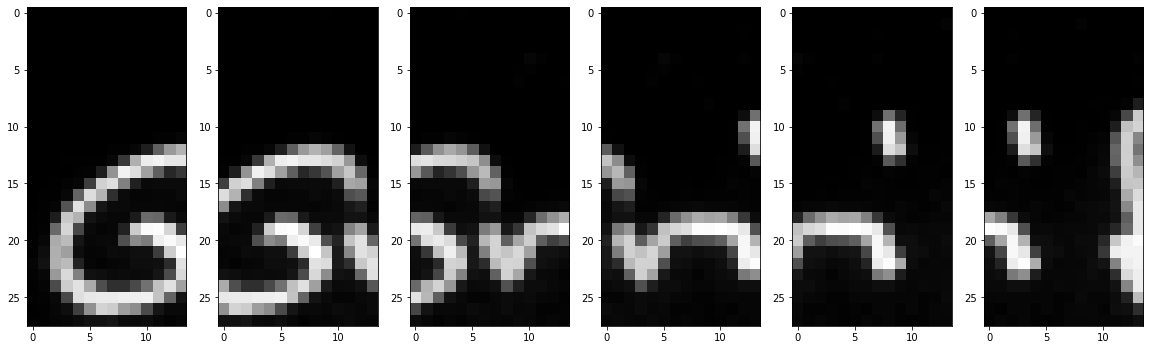

In [68]:
# remove batch size
patches = patches.squeeze(0)
fig = plt.figure(figsize=(20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i + 1)
    ax.imshow(patches[i].squeeze(0), cmap='gray')